**Gait Cycle Feature Extraction**

**Visualization**

<ipython-input-45-dade1e2401ba>:55: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  scatter_plots[keypoint].set_data(x, y)


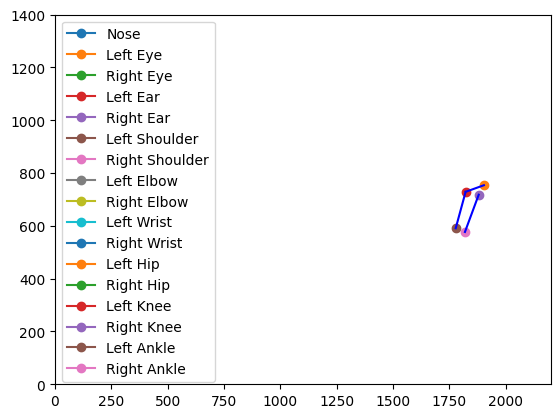

<ipython-input-45-dade1e2401ba>:55: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  scatter_plots[keypoint].set_data(x, y)


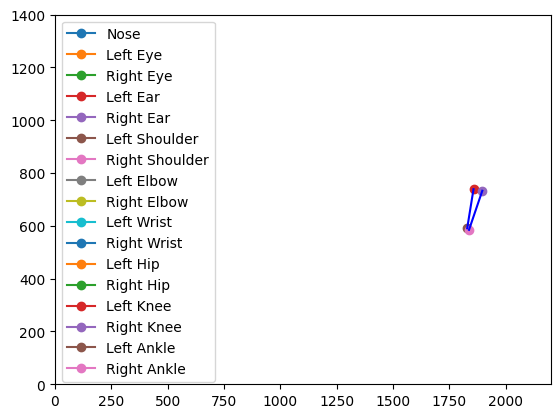

<ipython-input-45-dade1e2401ba>:55: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  scatter_plots[keypoint].set_data(x, y)


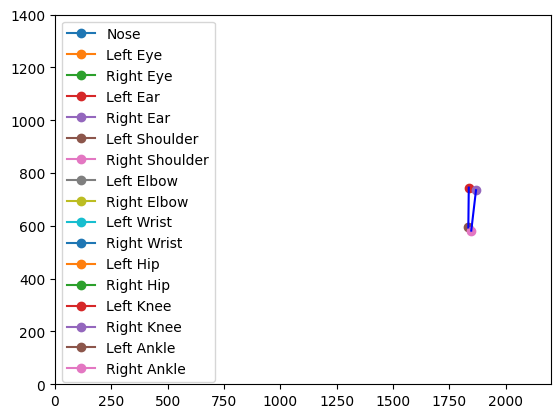

<ipython-input-45-dade1e2401ba>:55: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  scatter_plots[keypoint].set_data(x, y)


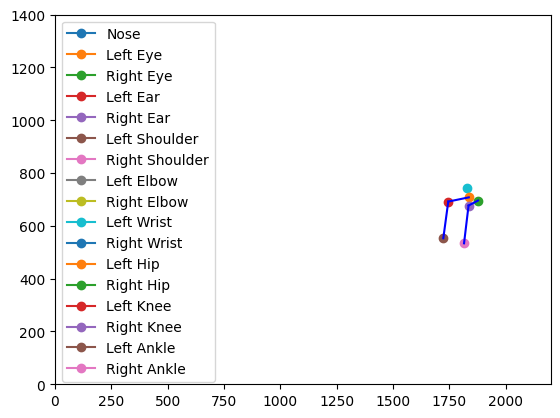

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FFMpegWriter

# Read data
data = pd.read_excel("/content/keypoints_4.xlsx")

# Group by video_name
video_groups = data.groupby('video_name')

# Iterate over each video group
for video_name, video_data in video_groups:
    # Group by frame number
    grouped = video_data.groupby('frame_number')

    # Create a figure and axis
    fig, ax = plt.subplots()
    ax.set_xlim(0, 2200)  # Adjust these limits based on your data
    ax.set_ylim(0, 1400)

    # Initialize scatter plots for each keypoint
    scatter_plots = {}
    for keypoint in video_data['keypoint'].unique():
        scatter_plots[keypoint], = ax.plot([], [], marker='o', label=keypoint)

    # Initialize lines between keypoints
    lines = {}
    for keypoint1, keypoint2 in [('Nose', 'Left Eye'), ('Nose', 'Right Eye'), ('Left Eye', 'Left Ear'),
                                 ('Right Eye', 'Right Ear'), ('Left Shoulder', 'Right Shoulder'),
                                 ('Left Shoulder', 'Left Elbow'), ('Right Shoulder', 'Right Elbow'),
                                 ('Left Elbow', 'Left Wrist'), ('Right Elbow', 'Right Wrist'),
                                 ('Left Shoulder', 'Left Hip'), ('Right Shoulder', 'Right Hip'),
                                 ('Left Hip', 'Left Knee'), ('Right Hip', 'Right Knee'),
                                 ('Left Knee', 'Left Ankle'), ('Right Knee', 'Right Ankle')]:
        lines[(keypoint1, keypoint2)], = ax.plot([], [], color='blue')

    # Define initialization function for animation
    def init():
        for keypoint in scatter_plots.values():
            keypoint.set_data([], [])
        for line in lines.values():
            line.set_data([], [])
        return list(scatter_plots.values()) + list(lines.values())

    def update(frame):
      frame_data = grouped.get_group(frame)
      updated_points = set()  # To keep track of points that have been updated in this frame
      for keypoint in frame_data['keypoint'].unique():
          keypoint_data = frame_data[frame_data['keypoint'] == keypoint]
          if not keypoint_data.empty:
              x = 1920 - keypoint_data['x_coordinate'].iloc[0]
              y = 1080 - keypoint_data['y_coordinate'].iloc[0]
              if (x, y) != (1920, 1080):  # Check if the point is not at (0, 0)
                  scatter_plots[keypoint].set_data(x, y)
                  updated_points.add(keypoint)
      # Clear remaining scatter plots if they were not updated in this frame
      for keypoint in scatter_plots.keys():
          if keypoint not in updated_points:
              scatter_plots[keypoint].set_data([], [])

      updated_lines = set()  # To keep track of lines that have been updated in this frame
      for keypoint1, keypoint2 in lines.keys():
          x1_data = frame_data[frame_data['keypoint'] == keypoint1]
          x2_data = frame_data[frame_data['keypoint'] == keypoint2]
          if not x1_data.empty and not x2_data.empty:
              x1 = 1920 - x1_data['x_coordinate'].iloc[0]
              y1 = 1080 - x1_data['y_coordinate'].iloc[0]
              x2 = 1920 - x2_data['x_coordinate'].iloc[0]
              y2 = 1080 - x2_data['y_coordinate'].iloc[0]
              if (x1, y1) != (1920, 1080) and (x2, y2) != (1920, 1080):  # Check if both points are not at (0, 0)
                  lines[(keypoint1, keypoint2)].set_data([x1, x2], [y1, y2])
                  updated_lines.add((keypoint1, keypoint2))
      # Clear remaining lines if they were not updated in this frame
      for keypoint1, keypoint2 in lines.keys():
          if (keypoint1, keypoint2) not in updated_lines:
              lines[(keypoint1, keypoint2)].set_data([], [])

      return list(scatter_plots.values()) + list(lines.values())





    # Create the animation
    ani = FuncAnimation(fig, update, frames=grouped.groups.keys(), init_func=init, blit=True)

    # Specify the writer using FFmpeg
    writer = FFMpegWriter(fps=20, metadata=dict(artist='Me'), bitrate=1800)

    # Save the animation as a video
    ani.save(f'{video_name}_movement_video.mp4', writer=writer)

    # Show the animation
    plt.legend()
    plt.show()


Number of steps (Left Ankle): 8
Number of steps (Right Ankle): 7
Total number of steps: 15


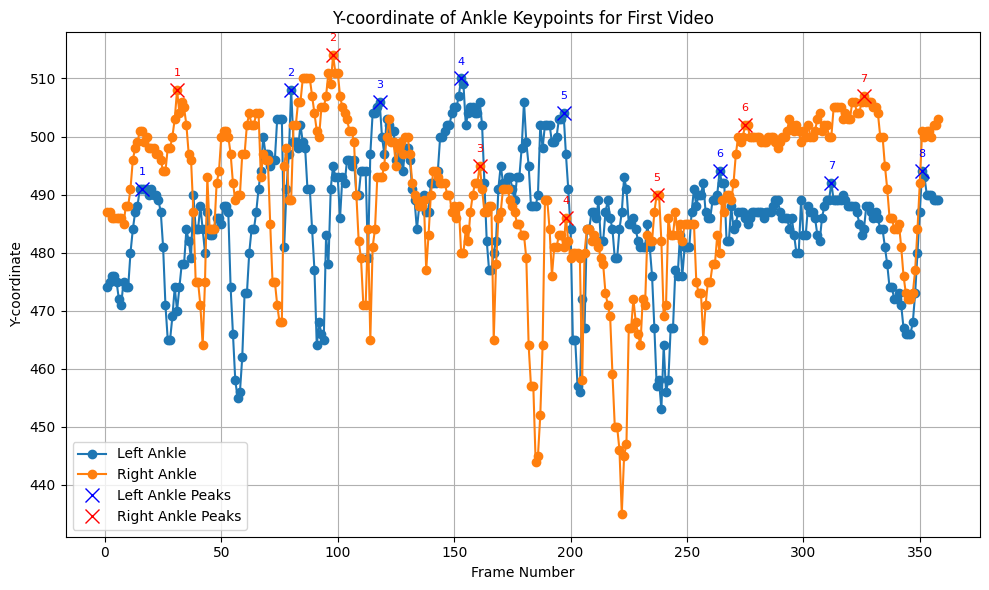

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Read the data from Excel
data = pd.read_excel("/content/keypoints_4.xlsx")

# Filter the data for the first video and left ankle keypoints
left_ankle_data = data[(data['video_name'] == '2015-32-AN.mp4') & (data['keypoint'] == 'Left Ankle')]

# Filter the data for the first video and right ankle keypoints
right_ankle_data = data[(data['video_name'] == '2015-32-AN.mp4') & (data['keypoint'] == 'Right Ankle')]

# Extract the frame number and y-coordinate columns for left ankle
left_frame_numbers = left_ankle_data['frame_number']
left_y_coordinates = left_ankle_data['y_coordinate']

# Extract the frame number and y-coordinate columns for right ankle
right_frame_numbers = right_ankle_data['frame_number']
right_y_coordinates = right_ankle_data['y_coordinate']

# Plot the line plot for left ankle
plt.figure(figsize=(10, 6))
plt.plot(left_frame_numbers, left_y_coordinates, marker='o', linestyle='-', label='Left Ankle')

# Plot the line plot for right ankle
plt.plot(right_frame_numbers, right_y_coordinates, marker='o', linestyle='-', label='Right Ankle')

plt.title('Y-coordinate of Ankle Keypoints for First Video')
plt.xlabel('Frame Number')
plt.ylabel('Y-coordinate')
plt.grid(True)

# Find peaks for left ankle
left_peaks, _ = find_peaks(left_y_coordinates, distance=35)  # Adjust distance threshold as needed

# Plot peaks for left ankle
plt.plot(left_frame_numbers.iloc[left_peaks], left_y_coordinates.iloc[left_peaks], "x", color='blue', markersize=10, label='Left Ankle Peaks')

# Find peaks for right ankle
right_peaks, _ = find_peaks(right_y_coordinates, distance=35)  # Adjust distance threshold as needed

# Plot peaks for right ankle
plt.plot(right_frame_numbers.iloc[right_peaks], right_y_coordinates.iloc[right_peaks], "x", color='red', markersize=10, label='Right Ankle Peaks')

# Annotate peaks with step numbers for left ankle
for i, peak in enumerate(left_peaks):
    plt.annotate(str(i+1), (left_frame_numbers.iloc[peak], left_y_coordinates.iloc[peak]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='blue')

# Annotate peaks with step numbers for right ankle
for i, peak in enumerate(right_peaks):
    plt.annotate(str(i+1), (right_frame_numbers.iloc[peak], right_y_coordinates.iloc[peak]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='red')

# Count the number of steps for each ankle
num_left_steps = len(left_peaks)
num_right_steps = len(right_peaks)

# Calculate the total number of steps
total_steps = num_left_steps + num_right_steps
print("Number of steps (Left Ankle):", num_left_steps)
print("Number of steps (Right Ankle):", num_right_steps)
print("Total number of steps:", total_steps)

plt.legend()

plt.tight_layout()
plt.show()


**X coardinates peaks**

Number of steps (Left Ankle): 9
Number of steps (Right Ankle): 8
Total number of steps: 17


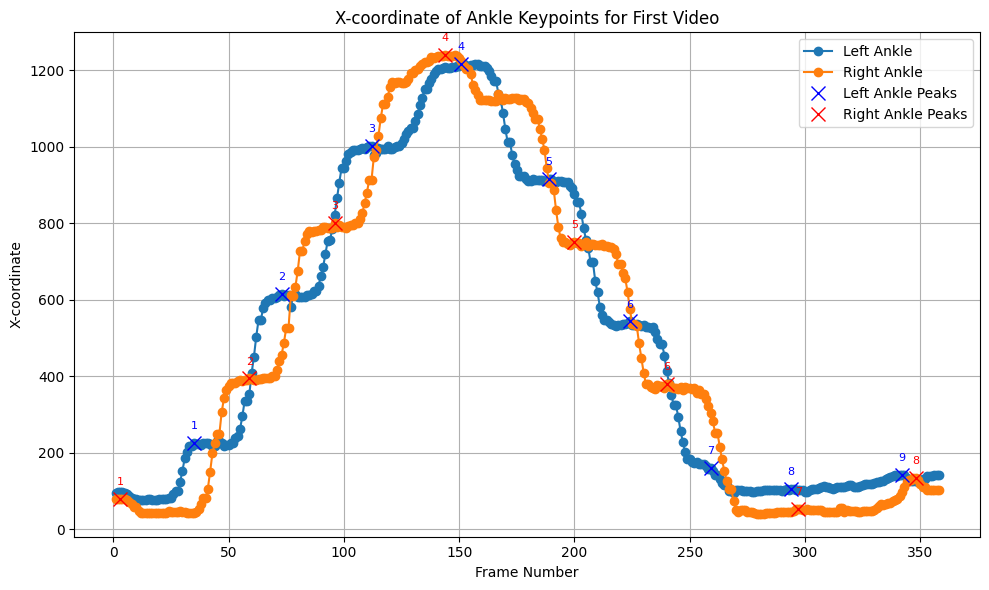

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Read the data from Excel
data = pd.read_excel("/content/keypoints_4.xlsx")

# Filter the data for the first video and left ankle keypoints
left_ankle_data = data[(data['video_name'] == '2015-32-AN.mp4') & (data['keypoint'] == 'Left Ankle')]

# Filter the data for the first video and right ankle keypoints
right_ankle_data = data[(data['video_name'] == '2015-32-AN.mp4') & (data['keypoint'] == 'Right Ankle')]

# Extract the frame number and y-coordinate columns for left ankle
left_frame_numbers = left_ankle_data['frame_number']
left_x_coordinates = left_ankle_data['x_coordinate']

# Extract the frame number and y-coordinate columns for right ankle
right_frame_numbers = right_ankle_data['frame_number']
right_x_coordinates = right_ankle_data['x_coordinate']

# Plot the line plot for left ankle
plt.figure(figsize=(10, 6))
plt.plot(left_frame_numbers, left_x_coordinates, marker='o', linestyle='-', label='Left Ankle')

# Plot the line plot for right ankle
plt.plot(right_frame_numbers, right_x_coordinates, marker='o', linestyle='-', label='Right Ankle')

plt.title('X-coordinate of Ankle Keypoints for First Video')
plt.xlabel('Frame Number')
plt.ylabel('X-coordinate')
plt.grid(True)

# Find peaks for left ankle
left_x_peaks, _ = find_peaks(left_x_coordinates, distance=35)  # Adjust distance threshold as needed

# Plot peaks for left ankle
plt.plot(left_frame_numbers.iloc[left_x_peaks], left_x_coordinates.iloc[left_x_peaks], "x", color='blue', markersize=10, label='Left Ankle Peaks')

# Find peaks for right ankle
right_x_peaks, _ = find_peaks(right_x_coordinates, distance=35)  # Adjust distance threshold as needed

# Plot peaks for right ankle
plt.plot(right_frame_numbers.iloc[right_x_peaks], right_x_coordinates.iloc[right_x_peaks], "x", color='red', markersize=10, label='Right Ankle Peaks')

# Annotate peaks with step numbers for left ankle
for i, peak in enumerate(left_x_peaks):
    plt.annotate(str(i+1), (left_frame_numbers.iloc[peak], left_x_coordinates.iloc[peak]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='blue')

# Annotate peaks with step numbers for right ankle
for i, peak in enumerate(right_x_peaks):
    plt.annotate(str(i+1), (right_frame_numbers.iloc[peak], right_x_coordinates.iloc[peak]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='red')

# Count the number of steps for each ankle
num_left_steps = len(left_x_peaks)
num_right_steps = len(right_x_peaks)

# Calculate the total number of steps
total_steps = num_left_steps + num_right_steps
print("Number of steps (Left Ankle):", num_left_steps)
print("Number of steps (Right Ankle):", num_right_steps)
print("Total number of steps:", total_steps)

plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
left_x_peaks

array([ 34,  72, 111, 150, 188, 223, 258, 293, 341])

In [ ]:
right_x_peaks

array([  2,  58,  95, 143, 199, 239, 296, 347])

**Frame Based Feature Extraction**

In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks

# Read the dataset into a DataFrame
data = pd.read_excel("/content/keypoints_4.xlsx")

# Group the data by video name
grouped_data = data.groupby('video_name')

for video_name, group in grouped_data:
    # Filter for only ankle keypoints
    ankle_data = group[(group['keypoint'] == 'Left Ankle') | (group['keypoint'] == 'Right Ankle')].copy()

    # Find peaks for left ankle y-coordinate
    left_ankle_data = ankle_data[ankle_data['keypoint'] == 'Left Ankle']
    left_peaks, _ = find_peaks(left_ankle_data['y_coordinate'], distance=45)  # Adjust distance threshold as needed

    # Find peaks for right ankle y-coordinate
    right_ankle_data = ankle_data[ankle_data['keypoint'] == 'Right Ankle']
    right_peaks, _ = find_peaks(right_ankle_data['y_coordinate'], distance=45)  # Adjust distance threshold as needed

    # Iterate through each pair of consecutive left and right ankle keypoints
    step_lengths = []
    min_length = min(len(left_peaks), len(right_peaks))
    for i in range(min_length - 1):
        left_peak_index = left_peaks[i]
        next_left_peak_index = left_peaks[i + 1]
        right_peak_index = right_peaks[i]
        next_right_peak_index = right_peaks[i + 1]

        # Calculate the Euclidean distance between consecutive left and right ankle keypoints
        left_distance = np.sqrt((left_ankle_data.iloc[next_left_peak_index]['x_coordinate'] - left_ankle_data.iloc[left_peak_index]['x_coordinate'])**2 +
                                (left_ankle_data.iloc[next_left_peak_index]['y_coordinate'] - left_ankle_data.iloc[left_peak_index]['y_coordinate'])**2)

        right_distance = np.sqrt((right_ankle_data.iloc[next_right_peak_index]['x_coordinate'] - right_ankle_data.iloc[right_peak_index]['x_coordinate'])**2 +
                                (right_ankle_data.iloc[next_right_peak_index]['y_coordinate'] - right_ankle_data.iloc[right_peak_index]['y_coordinate'])**2)

        # Compute the average of left and right step lengths
        step_lengths.append((left_distance + right_distance) / 2)

    # Calculate the average step length
    average_step_length = np.mean(step_lengths)

    # Calculate total distance in pixels
    total_distance_pixels = sum(step_lengths)

    # Convert total distance from pixels to meters
    pixel_to_meter = 0.003029823
    total_distance_meters = total_distance_pixels * pixel_to_meter


    # Calculate total time in frames
    total_frames = ankle_data['frame_number'].max()

    # Convert total time from frames to seconds (assuming 30 frames per second)
    frame_rate = 30  # assuming 30 frames per second
    total_time_seconds = total_frames / frame_rate

    # Calculate walking speed (in meters per second)
    walking_speed_meters = total_distance_meters / total_time_seconds

    # Calculate acceleration (using final velocity - initial velocity)
    initial_velocity = 0
    final_velocity = walking_speed_meters
    acceleration = (final_velocity - initial_velocity) / total_time_seconds

    # Calculate total number of steps
    # Count the number of steps for each ankle
    num_left_steps = len(left_peaks)
    num_right_steps = len(right_peaks)

    # Calculate the total number of steps
    total_steps = num_left_steps + num_right_steps
    average_step_length = (total_distance_pixels * pixel_to_meter)/total_steps
    # Calculate cadence
    cadence = total_steps / (total_time_seconds / 60)  # converting time to minutes

    print("-----------------------------------------")
    # Print results for each video
    print("Video:", video_name)
    print("Average Step Length:", average_step_length, "m")
    print("Speed:", walking_speed_meters, "m/s")
    print("Acceleration:", acceleration, "m/s^2")
    print("Total Number of Steps:", total_steps)
    print("Cadence:", cadence, "steps/minute")
    print("-----------------------------------------")
    print()


-----------------------------------------
Video: 2015-32-AN.mp4
Average Step Length: 0.554834204590015 m
Speed: 0.5579338370178921 m/s
Acceleration: 0.04675423215233733 m/s^2
Total Number of Steps: 12
Cadence: 60.33519553072625 steps/minute
-----------------------------------------

-----------------------------------------
Video: 2015-32-M.mp4
Average Step Length: 0.40432652763432675 m
Speed: 0.3850728834612636 m/s
Acceleration: 0.026195434249065553 m/s^2
Total Number of Steps: 14
Cadence: 57.142857142857146 steps/minute
-----------------------------------------

-----------------------------------------
Video: 2015-32-S.mp4
Average Step Length: 0.5076471042858085 m
Speed: 0.5640523380953427 m/s
Acceleration: 0.05697498364599421 m/s^2
Total Number of Steps: 11
Cadence: 66.66666666666666 steps/minute
-----------------------------------------

-----------------------------------------
Video: 2015-33-AN.mp4
Average Step Length: 0.3505155094450902 m
Speed: 0.40444097243664257 m/s
Accelera